In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

DATA PREPROCESSING

In [6]:
import pandas as pd
df=pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [10]:
df['species']=df['species'].str.replace('Iris-','')
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

DATA VISUALIZATION

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


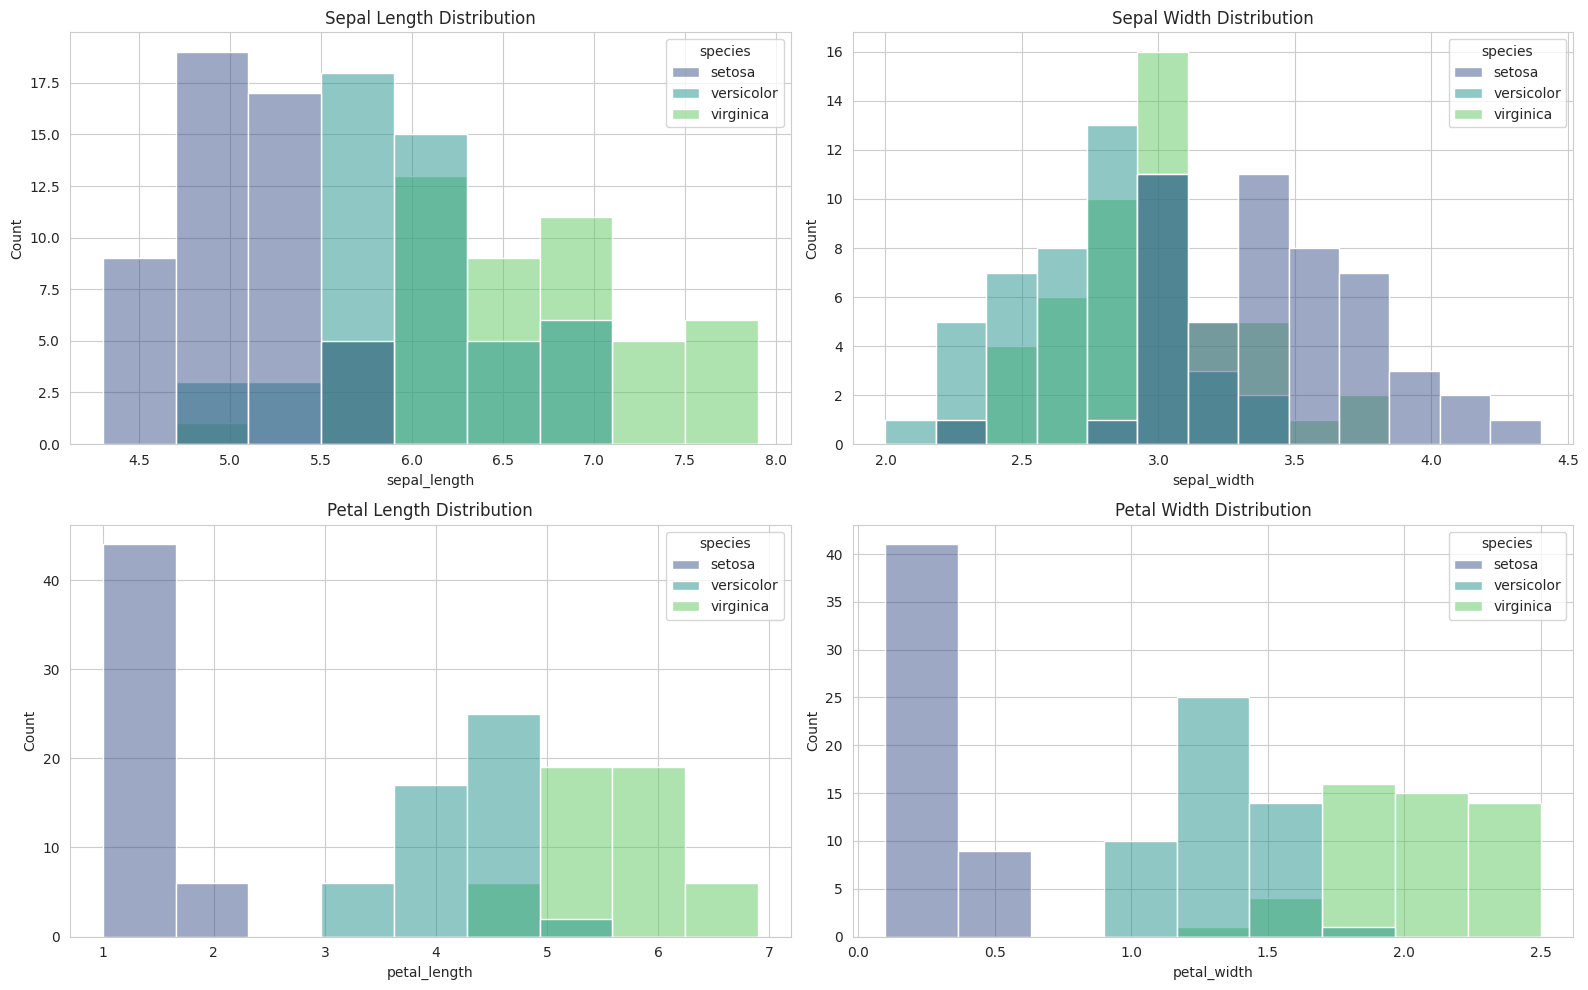

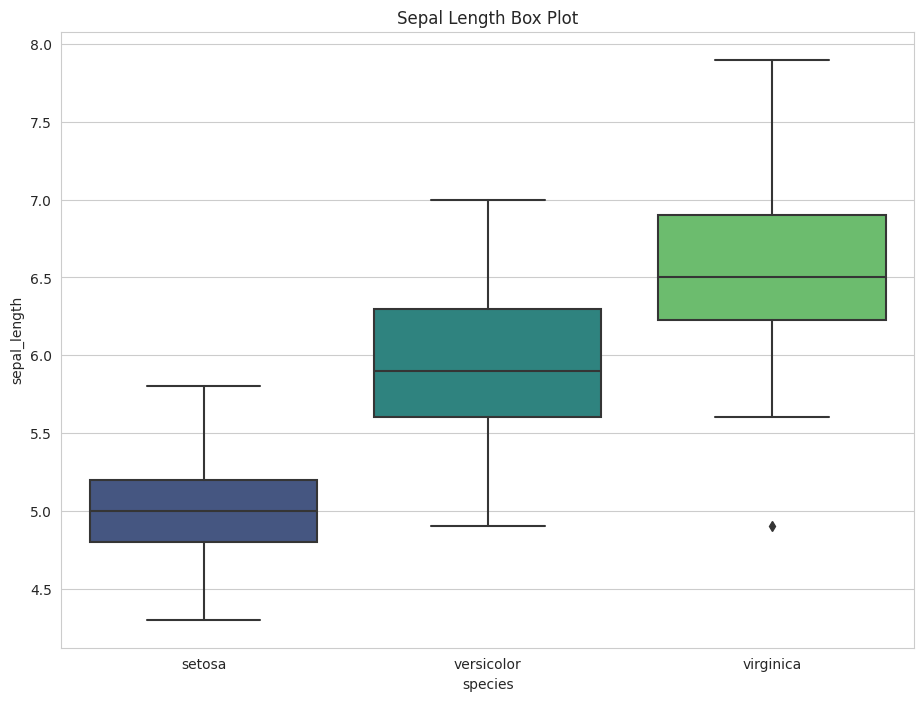

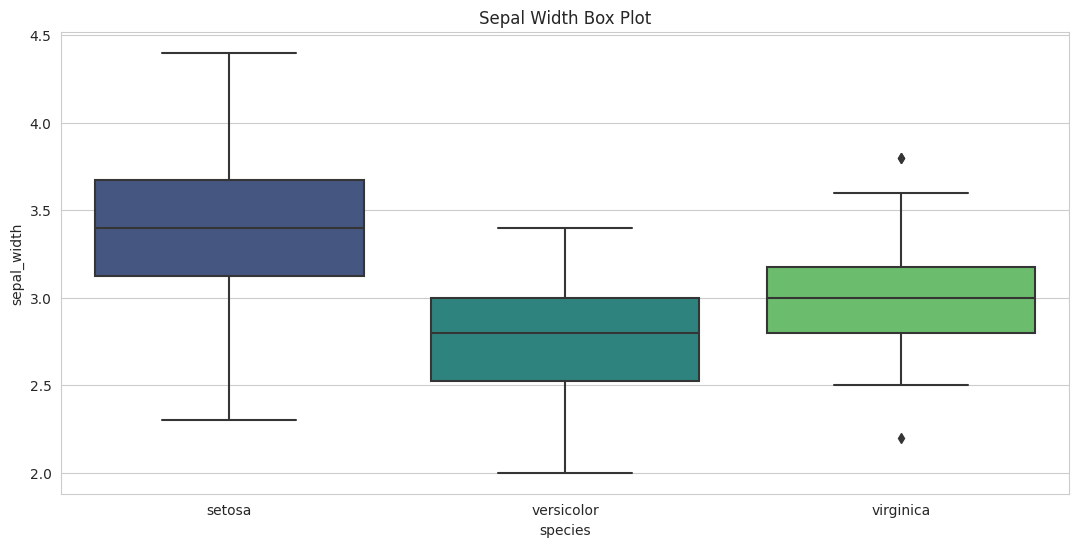

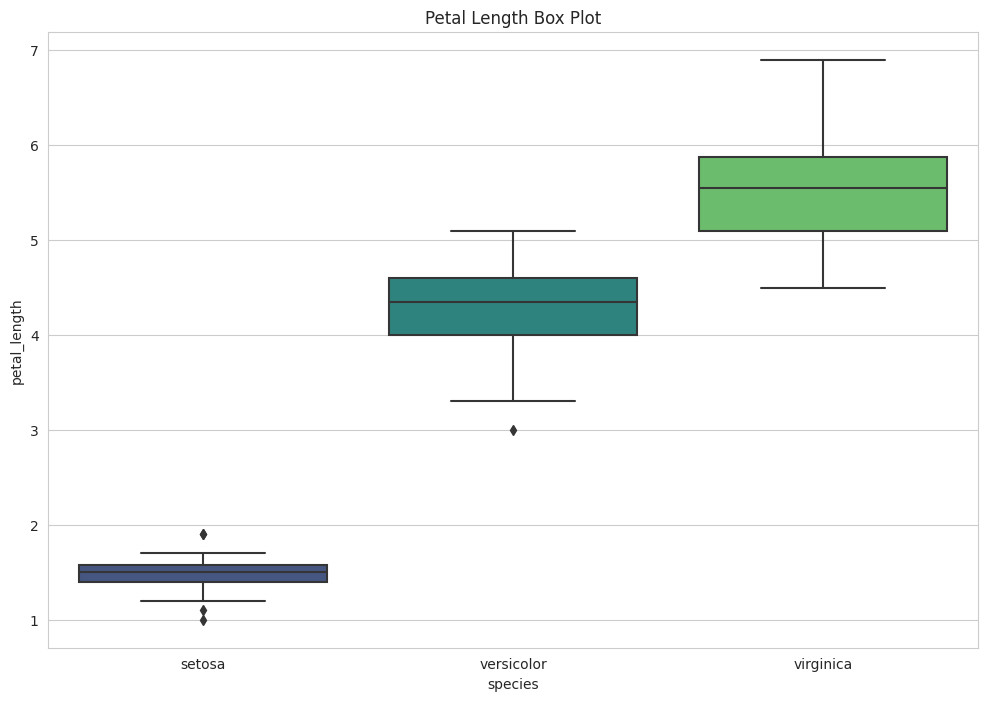

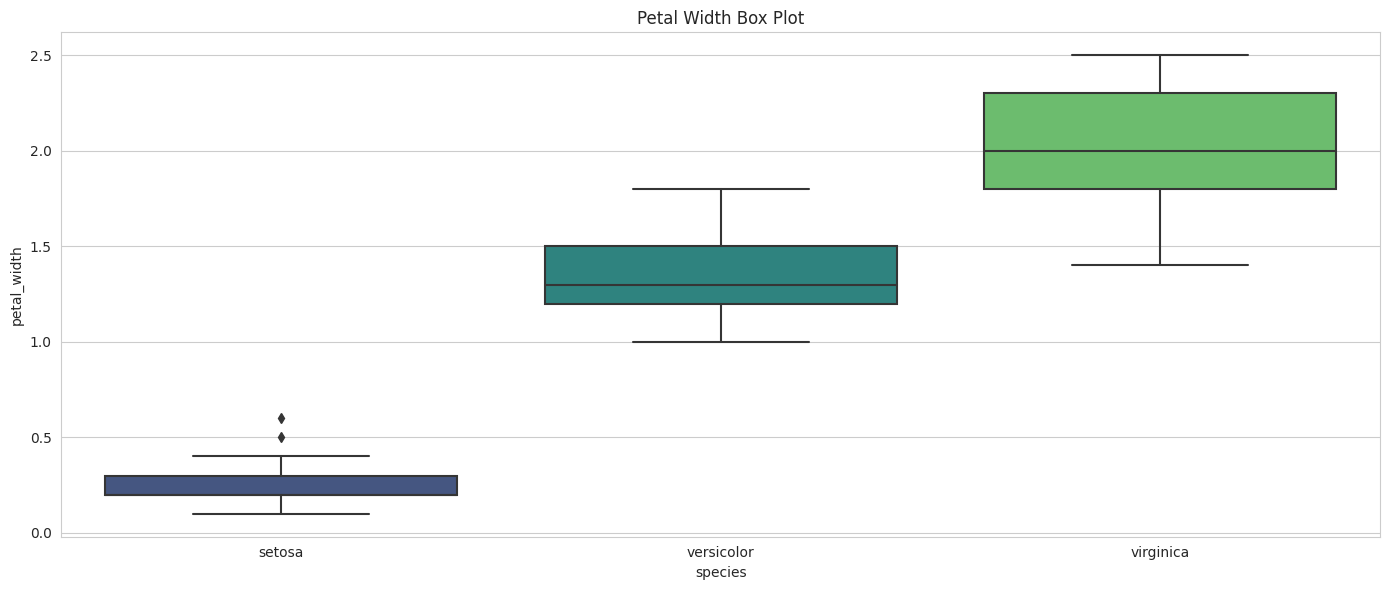

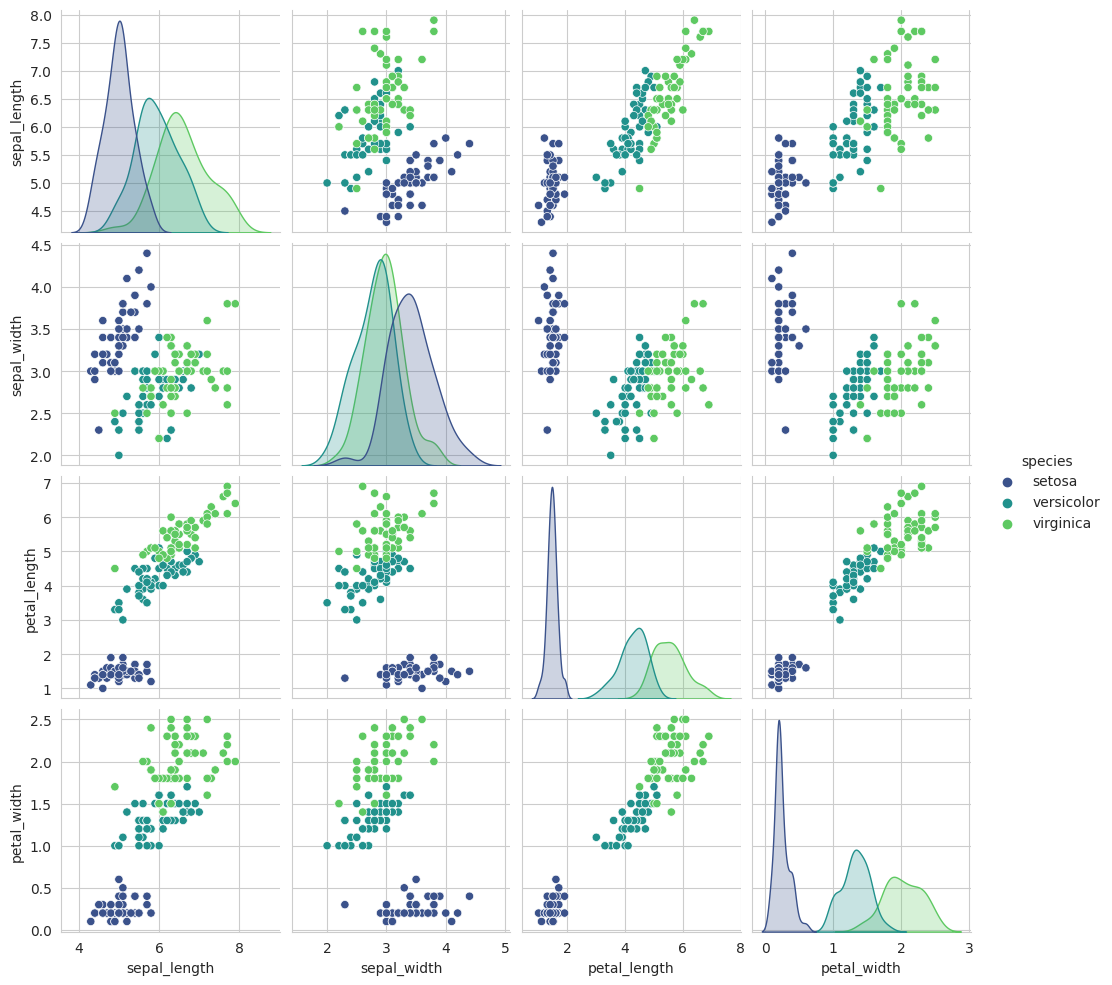

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

palette = "viridis"

plt.figure(figsize=(16, 10))

# Histograms for sepal length, sepal width, petal length, and petal width
plt.subplot(2, 2, 1)
sns.histplot(data=df, x="sepal_length", hue="species", palette=palette)
plt.title("Sepal Length Distribution")

plt.subplot(2, 2, 2)
sns.histplot(data=df, x="sepal_width", hue="species", palette=palette)
plt.title("Sepal Width Distribution")

plt.subplot(2, 2, 3)
sns.histplot(data=df, x="petal_length", hue="species", palette=palette)
plt.title("Petal Length Distribution")
plt.subplot(2, 2, 4)
sns.histplot(data=df, x="petal_width", hue="species", palette=palette)
plt.title("Petal Width Distribution")

plt.tight_layout()

# Box plots for each feature
plt.figure(figsize=(11, 8))
sns.boxplot(data=df, x="species", y="sepal_length", palette=palette)
plt.title("Sepal Length Box Plot")

plt.figure(figsize=(13, 6))
sns.boxplot(data=df, x="species", y="sepal_width", palette=palette)
plt.title("Sepal Width Box Plot")

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="species", y="petal_length", palette=palette)
plt.title("Petal Length Box Plot")

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x="species", y="petal_width", palette=palette)
plt.title("Petal Width Box Plot")
plt.tight_layout()

# Pair plots to visualize relationships between features
sns.set_style('whitegrid')
sns.pairplot(df, hue='species', palette=palette)
plt.show()

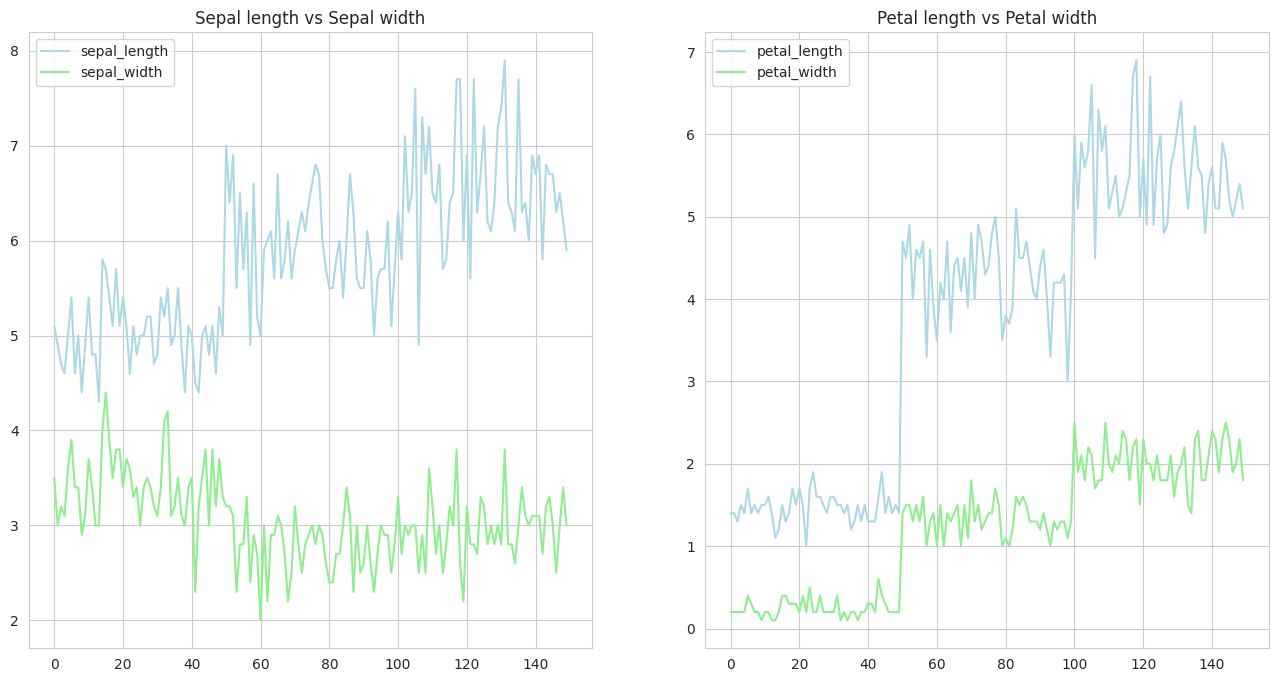

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].plot(df['sepal_length'], label='sepal_length',color='lightblue')
ax[0].plot(df['sepal_width'], label='sepal_width',color='lightgreen')
ax[0].set_title('Sepal length vs Sepal width')
ax[0].legend()

ax[1].plot(df['petal_length'], label='petal_length',color='lightblue')
ax[1].plot(df['petal_width'], label='petal_width',color='lightgreen')
ax[1].set_title('Petal length vs Petal width')
ax[1].legend()

plt.show()

MODELING

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

